In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import altair as alt

In [2]:
url='https://raw.githubusercontent.com/KaonToPion/datasets/main/netflix_titles.csv'
df = pd.read_csv(url)

In [4]:
df['date_added']=pd.to_datetime(df['date_added'])
df['year_added']=df['date_added'].dt.year
df['month_added']=df['date_added'].dt.month

In [4]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

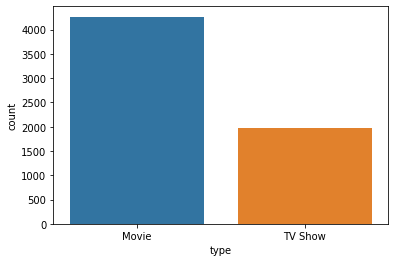

In [6]:
sns.countplot(data=df,x='type')

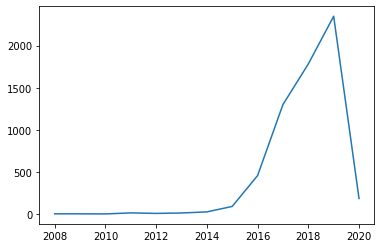

In [9]:
count_year_df=df.groupby('year_added').count().reset_index()

plt.plot(count_year_df['year_added'],count_year_df['type'])

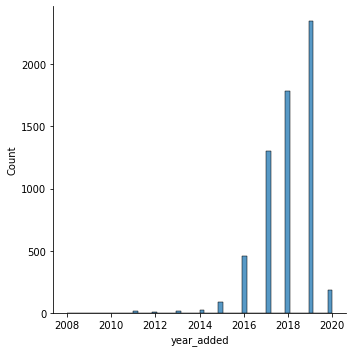

In [14]:
sns.displot(data=df,x='year_added' )

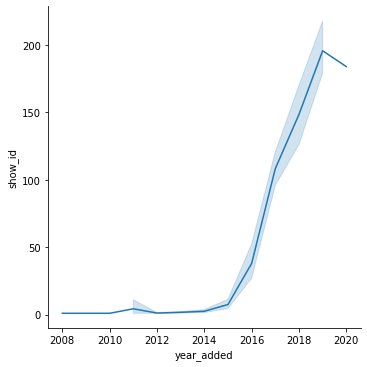

In [18]:
count_year_month_df=df.groupby(['year_added','month_added']).count().reset_index()
#plt.plot(count_year_df['year_added'],count_year_df['type'])

sns.relplot(data=count_year_month_df,x='year_added',y='show_id',kind='line')

In [16]:
count_year_month_df

,year_added,month_added,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,2008.0,1.0,1,1,1,1,1,1,1,1,1,1,1,1
1,2008.0,2.0,1,1,1,0,0,1,1,1,1,1,1,1
2,2009.0,5.0,1,1,1,1,1,1,1,1,1,1,1,1
3,2009.0,11.0,1,1,1,1,1,1,1,1,1,1,1,1
4,2010.0,11.0,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,2019.0,9.0,162,162,162,98,152,145,162,162,162,162,162,162
88,2019.0,10.0,220,220,220,136,199,202,220,220,220,220,220,220
89,2019.0,11.0,292,292,292,201,277,266,292,292,292,292,292,292
90,2019.0,12.0,232,232,232,180,221,201,232,232,232,232,232,232


In [5]:
genero=list(df['listed_in'])
gen_list=[]
for gen in genero:
  c=list(gen.split(','))
  for j in c:
    gen_list.append(j.replace(' ',''))


In [8]:
from collections import Counter
counter_generos=Counter(gen_list)

In [11]:
from wordcloud import WordCloud

In [15]:
text=counter_generos.keys()

In [18]:
wordcloud=WordCloud( max_font_size=50,max_words=100,background_color='black').generate(str(text))


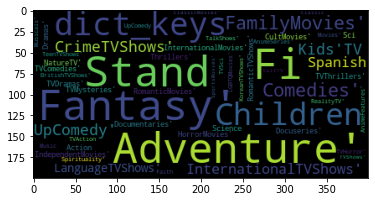

In [20]:
plt.imshow(wordcloud)